<a href="https://colab.research.google.com/github/aso1901103/AI_tech2020/blob/master/2020AI030A_family_mosaic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ライブラリのインポート

In [1]:
# 画像を表示するためにpyplot
import matplotlib.pyplot as plt
# openCV
import cv2
# webからダウンロードするライブラリ
import urllib.request as req

### 画像の保存

In [2]:
# ダウンロード元のurl文字列
url = "https://raw.githubusercontent.com/masatokg/sample_photo/master/familyface001.PNG"
# 保存ファイル名
savefile = "family.png"
# 画像をダウンロードして保存
req.urlretrieve(url, savefile)
# 保存した画像をプログラムに読み込む
img = cv2.imread(savefile)

### そのまま表示

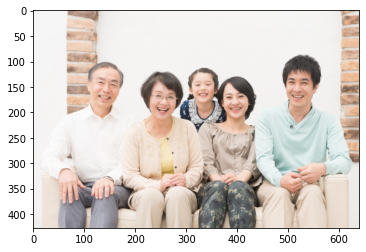

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### 白黒表示

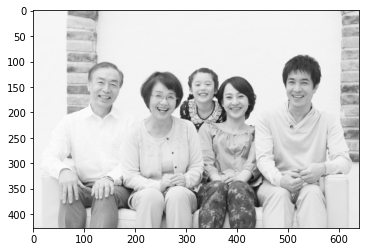

In [4]:
# 物体認識するために、白黒(グレースケール)に変換した画像イメージを作る
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.show()

### カスケードファイルをダウンロードして学習モデルの生成

In [5]:
# カスケードファイルをダウンロード
url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt.xml"
# 保存ファイル名
cascade_file = "cascade_file.xml"
# XMLをダウンロードして保存
req.urlretrieve(url, cascade_file)
# カスケードXMLをプログラムに読み込む(学習モデルのインスタンスを生成)
cascade = cv2.CascadeClassifier(cascade_file)

### 顔認識の実行

In [6]:
# 白黒画像とカスケード物体検出器モデルを使って顔認識を実行する
# 引数のminSizeは画像の中で物体として認識する最小エリアサイズ
face_list = cascade.detectMultiScale(img_gray, minSize=(50, 50))
if len(face_list) == 0:
  print('なし')

### 顔認識したところに青枠をつける

In [7]:
# 検出した数だけループ(face_listは(x, y, w, h)というタプルの配列リスト)
for (x, y, w, h) in face_list:
  print("顔の座標: x=", x, " y=", y, "横幅W=", w, " 縦幅H=", h)
  # 矩形(rectangle)の色ピクセル情報を定義
  blue = ( 255, 0, 0) # BGRで3色のタプルを定義
  # img画像(元の画像)に矩形を追加 引数は 対象画像、矩形の左上座標、右下座標、色情報、線の細さの順
  cv2.rectangle( img, (x,y), (x+w, y+h), blue, thickness=5 )

顔の座標: x= 487  y= 117 横幅W= 66  縦幅H= 66
顔の座標: x= 112  y= 118 横幅W= 67  縦幅H= 67
顔の座標: x= 304  y= 122 横幅W= 58  縦幅H= 58
顔の座標: x= 226  y= 146 横幅W= 62  縦幅H= 62
顔の座標: x= 367  y= 148 横幅W= 59  縦幅H= 59


### 青枠の画像の表示

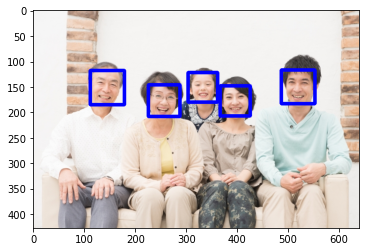

In [8]:
# 矩形が追加された画像データ(img)をファイル保存
cv2.imwrite("face-detect.png", img)
# 表示用のプロットを作成
plt.imshow( cv2.cvtColor( img, cv2.COLOR_BGR2RGB ) )
# プロットを画面に表示
plt.show()

### モザイクをかけるための関数

In [9]:
# モザイク処理の関数 mosaic
# 引数は 対象画像、エリアを表すタプル(左上のx座標y座標、右下のx座標y座標)、縮小時のサイズ
def mosaic( img, rect, size ):
  # モザイクをかける領域座標を変数に代入
  (x1, y1, x2, y2) = rect 
  w = x2 - x1 # 横幅を計算
  h = y2 - y1 # 縦幅を計算
  # 画像データを[開始行:終了行, 開始列:終了列]で指定して切り抜き
  i_rect = img[ y1:y2, x1:x2 ]
  # 切り抜いた画像を指定サイズに縮小して(ピクセルをつぶす)コピー
  i_small = cv2.resize( i_rect, ( size, size ) )
  # 縮小した画像データを元のサイズに拡大する(つぶれたピクセル情報のまま拡大される)
  # interpolation は拡大時にどんなピクセルで補完するかを指定
  i_mos = cv2.resize( i_small, (w, h), interpolation=cv2.INTER_AREA )
  # できあがったモザイクデータを元の画像(のコピー)に重ねる
  img2 = img.copy()
  img2[y1:y2, x1:x2] = i_mos # 行, 列で指定した領域にi_mosを上書き
  return img2 # モザイクつきのコピーをリターン

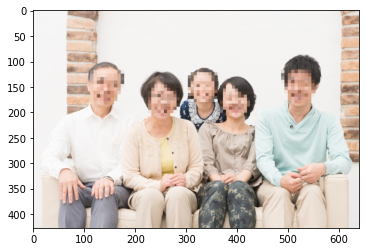

In [10]:
img2 = cv2.imread(savefile)
# 検出したエリアに自作関数でモザイクをかける
for( x, y, w, h ) in face_list:
  img2 = mosaic( img2, (x, y, x+w, y+h), 10 )
# モザイクをつけた画像を表示
cv2.imwrite( "face-detect.png", img2 ) #画像保存
plt.imshow( cv2.cvtColor( img2, cv2.COLOR_BGR2RGB ) )
plt.show()